In [1]:
import matplotlib.pyplot as plt


In [2]:
weights = [162.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0 # day 
scale_factor = 4.0/10 # This we can chose to be anything
gain_rate = -3

In [3]:
def predict_using_gain_guess(estimated_weight, gain_rate):
    estimates, predictions = [estimated_weight], [estimated_weight]
    for z in weights:
        predicted_weight = estimated_weight + gain_rate * time_step# update filter
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight) 
        
        estimates.append(estimated_weight) 
        predictions.append(predicted_weight) 
        
    return estimates, predictions

initial_estimate = 160.0
estimates, predictions = predict_using_gain_guess(initial_estimate, gain_rate)

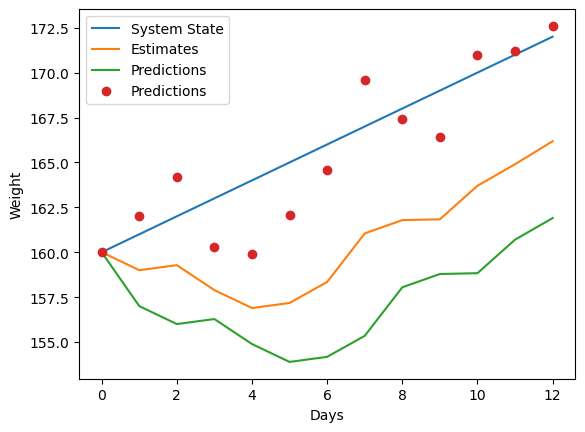

In [4]:
dots = [160]+weights
fig = plt.figure()
ax = fig.add_subplot(111)
system_state = [initial_estimate + i for i in range(len(weights)+1)]
ax.plot(system_state,label='System State')
ax.plot(estimates,label='Estimates')
ax.plot(predictions,label='Predictions')
ax.plot(dots, "o",label='Predictions')
plt.xlabel("Days")
plt.ylabel("Weight")
ax.legend()

## What if we now change our gain rate based on observable measurements of the system

#### Next Slide First!!!

In [23]:
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0 # day 
scale_factor = 0.1#4.0/10 # This we can chose to be anything
gain_rate = 1.0 # Initial Guess
gain_scale = 0.1#1./3

In [24]:
def gh(estimated_weight, gain_rate):
    estimates, predictions = [estimated_weight], [estimated_weight]
    for z in weights:
        predicted_weight = estimated_weight + gain_rate * time_step# update filter
        gain_rate = gain_rate
        
        
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight) 
        gain_rate = gain_rate + gain_scale   * (z - predicted_weight/time_step)
        estimates.append(estimated_weight) 
        predictions.append(predicted_weight) 
        
    return estimates, predictions

initial_estimate = 160.0
estimates, predictions = gh(initial_estimate, gain_rate)

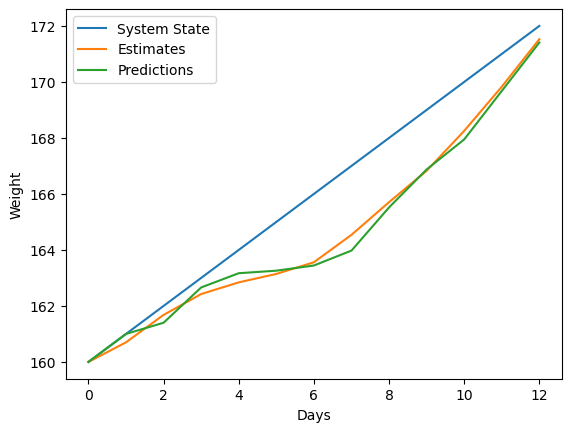

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
system_state = [initial_estimate + i for i in range(len(weights)+1)]
ax.plot(system_state,label='System State')
ax.plot(estimates,label='Estimates')
ax.plot(predictions,label='Predictions')
plt.xlabel("Days")
plt.ylabel("Weight")
ax.legend()